/var/folders/3h/4kz4z04s4h595rm_hpjlfy8w0000gn/T/ipykernel_9959/3842748368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/var/folders/3h/4kz4z04s4h595rm_hpjlfy8w0000gn/T/ipykernel_9959/3842748368

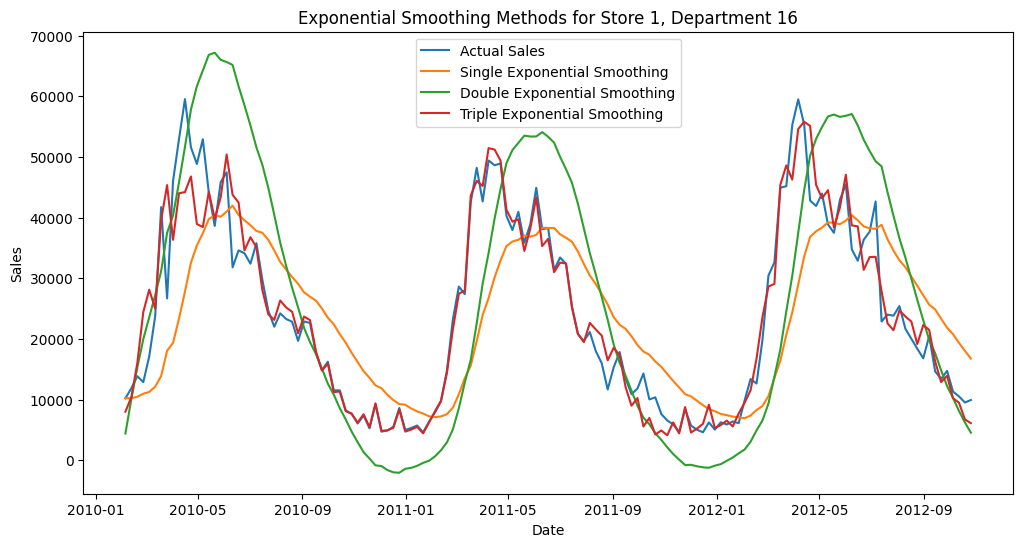

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('retail_sales_data.csv')

# Filter for Store 1, Department 16
filtered_data = data[(data['Store'] == 1) & (data['Dept'] == 16)]

# Assuming the file has a time column (like 'Date') and a sales column (like 'Weekly_Sales')
# We need to set the time column as the index for time series analysis
if 'Date' in filtered_data.columns and 'Weekly_Sales' in filtered_data.columns:
    filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
    filtered_data.set_index('Date', inplace=True)

    # Parameters for exponential smoothing
    alpha = beta = gamma = 0.15
    N = 52  # Seasonal period for Triple Smoothing

    # Single Exponential Smoothing
    ses = SimpleExpSmoothing(filtered_data['Weekly_Sales']).fit(smoothing_level=alpha, optimized=False)
    ses_forecast = ses.fittedvalues

    # Double Exponential Smoothing (Holt's)
    des = ExponentialSmoothing(filtered_data['Weekly_Sales'], trend='add').fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
    des_forecast = des.fittedvalues

    # Triple Exponential Smoothing (Holt-Winters)
    tes = ExponentialSmoothing(filtered_data['Weekly_Sales'], trend='add', seasonal='add', seasonal_periods=N).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, optimized=False)
    tes_forecast = tes.fittedvalues

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Weekly_Sales'], label='Actual Sales')
    plt.plot(ses_forecast, label='Single Exponential Smoothing')
    plt.plot(des_forecast, label='Double Exponential Smoothing')
    plt.plot(tes_forecast, label='Triple Exponential Smoothing')
    plt.title('Exponential Smoothing Methods for Store 1, Department 16')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
else:
    message = "Required columns 'Date' and/or 'Weekly_Sales' not found in the data."
    message

